___
# Ciência dos Dados - PROJETO 1

## Matheus Augusto Soares
___

## É possivel ver a injustiça sofrida pelas mulheres avaliando o nivel de escolaridade e renda dos sexos, pelas regioes do brasil?

___
## Introdução

Através da análise de gráficos que comparam a escolaridade das mulheres e dos homens e comparando comparando com os valores encontrado na renda, pretendo demonstrar a irregularidade por conta da porcentagem de mulheres que possuem mais escolaridade ,porém, possuem menos renda

___
## Filtros da base de dados

In [242]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from numpy import *

In [243]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\mathe\Desktop\Ano Da DP\Ciencia dos Dados\Projeto versão melhorada upgradada 2.0.11123.12314.12001


In [244]:
#Lendo a base de dados 
dados = pd.read_csv('PES2015.csv',sep=',')
dados.head()

#Identificando as variáveis
#UF=Unidade Federal
#V0302=Sexo
#V6003=Curso que frequenta
#V8005=Idade
#V9532=Rendimento mensal em dinheiro que recebia normalmente, no mês de referência, no trabalho principal da semana de referência
df1=dados.loc[:,['UF','V0302',"V6003",'V9532','V8005']]

#Separando as variáveis de acordo com o tipo
df1.UF= df1.UF.astype('category')
df1.V0302=df1.V0302.astype('category')
df1.V6003=df1.V6003.astype('category')
df1.V9532=df1.V9532.astype('float')

#Substituindo os valores por nomes de identificação
df1.UF.cat.categories = ("Rondônia","Acre","Amazonas","Roraima","Pará","Amapa","Tocantins","Maranhão","Piauí","Ceará","Rio Grande do Norte","Paraíba","Pernambuco","Alagoas","Sergipe","Bahia","Minas Gerais","Espírito Santo","Rio De Janeiro","São Paulo","Paraná","Santa Catarina","Rio Grande do Sul","Mato Grosso do Sul","Mato Grosso","Goiás","Distrito Federal")
df1.V0302.cat.categories = ("Masculino","Feminino")
df1.V6003.cat.categories= ('Regular do Ensino Fundamental','Regular Ensino Médio','Educação de jovens e adultos ou supletivo do ensino fundamental','Educação de jovens e adultos ou supletivo do ensino médio','Superior de graduação','Alfabetização de jovens e adultos','Creche','Classe de alfabetização - CA ','Maternal, jardim de infância etc.','Pré-vestibular','Mestrado ou doutorado')

In [245]:
#Filtrando a idade, para realizar a analise com foco nas pessoas consideradas adultas
booleans=[]

for age in df1.V8005:
    if age >= 18 and age <= 45:
        booleans.append(True)
    else:
        booleans.append(False)

In [246]:
adult=pd.Series(booleans)
df2=df1[booleans]

In [385]:
#Retirando os dados desconhecidos, para uma melhor análise, é necessário comparar tanto a escolaridade quanto a renda, ou seja é de extrema importância ambos dados
df3=df2.dropna(subset=['UF','V0302',"V6003",'V9532','V8005'])

In [362]:
#Criando coluna para definir as regiões
df3 = df3.copy()

df3.loc[(df3.UF=="Rio Grande dos Sul")|(df3.UF=="Santa Catarina")|(df3.UF=="Paraná"),"Região"]="Sul"
df3.loc[(df3.UF=="São Paulo")|(df3.UF=="Minas Gerais")|(df3.UF=="Rio de Janeiro")|(df3.UF=="Espírito Santo"),"Região"]="Sudeste"
df3.loc[(df3.UF=="Goiás")|(df3.UF=="Mato Grosso")|(df3.UF=="")|(df3.UF=="Mato Grosso do Sul")|(df3.UF=="Distrito Federal"),"Região"]="Centro-Oeste"
df3.loc[(df3.UF=="Amazonas")|(df3.UF=="Acre")|(df3.UF=="Roraima")|(df3.UF=="Amapá")|(df3.UF=="Pará")|(df3.UF=="Tocantins")|(df3.UF=="Rondônia"),"Região"]="Norte"
df3.loc[(df3.UF=="Maranhão")|(df3.UF=="Piauí")|(df3.UF=="Bahia")|(df3.UF=="Ceará")|(df3.UF=="Rio Grande do Norte")|(df3.UF=="Paraíba")|(df3.UF=="Pernambuco")|(df3.UF=="Alagoas")|(df3.UF=="Sergipe"),"Região"]="Nordeste"

#Filtrando escolaridade
df3.loc[(df3.V6003=="Educação de jovens e adultos ou supletivo do ensino fundamental"),"Escolaridade2"]="Educação de jovens e adultos"
df3.loc[(df3.V6003=="Educação de jovens e adultos ou supletivo do ensino médio"),"Escolaridade2"]="Educação de jovens e adultos"
df3.loc[(df3.V6003=='Regular do Ensino Fundamental'),"Escolaridade2"]='Regular do Ensino Fundamental'
df3.loc[(df3.V6003=='Regular Ensino Médio'),"Escolaridade2"]='Regular Ensino Médio'
df3.loc[(df3.V6003=='Superior de graduação'),"Escolaridade2"]='Superior de graduação'
df3.loc[(df3.V6003=='Alfabetização de jovens e adultos'),"Escolaridade2"]='Alfabetização de jovens e adultos'
df3.loc[(df3.V6003=='Creche'),"Escolaridade2"]='Creche'
df3.loc[(df3.V6003=='Classe de alfabetização - CA '),"Escolaridade2"]='Classe de alfabetização - CA '
df3.loc[(df3.V6003=='Maternal, jardim de infância etc.'),"Escolaridade2"]='Maternal, jardim de infância etc.'
df3.loc[(df3.V6003=='Pré-vestibular'),"Escolaridade2"]='Pré-vestibular'
df3.loc[(df3.V6003=='Mestrado ou doutorado'),"Escolaridade2"]='Mestrado ou doutorado'

In [363]:
filtrado=df3.loc[:,['Região','V0302',"Escolaridade2",'V9532','V8005']]

In [364]:
#Nomeando Colunas 
nomeado= filtrado.rename(columns={'V0302': 'Sexo', 'Escolaridade2': 'Escolaridade','V9532':'Renda','V8005':'Idade'})

In [365]:
#Retirando outliers da coluna "Renda" por conta de valores muito altos  
out=nomeado[abs(nomeado.Renda-nomeado.Renda.mean())<=(3*nomeado.Renda.std())]
bra = out['Renda']

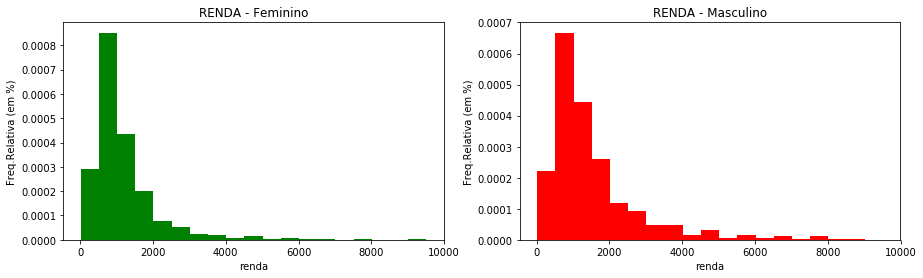

In [366]:
#Gráficos de Renda 
#Definindo Faixa de saltos
faixa = arange(15,10000,500)

#Tamanho dos Gráficos
fig = plt.figure(figsize=(15, 4))

#Feminino
plt.subplot(121)
renda_fem = pd.cut(out.Renda[out.Sexo=='Feminino'], bins=faixa, right=False)
plot = out.Renda[out.Sexo=='Feminino'].plot.hist(bins=faixa,title='RENDA - Feminino',normed=1,color=('g'))

plt.ylabel('Freq.Relativa (em %)')
plt.xlabel('renda')

#Masculino
plt.subplot(122)
renda_masc = pd.cut(out.Renda[out.Sexo=='Masculino'], bins=faixa, right=False)
plot2 = out.Renda[out.Sexo=='Masculino'].plot.hist(bins=faixa,normed=1,title='RENDA - Masculino',color=('r'))
plt.ylabel('Freq.Relativa (em %)')
plt.xlabel('renda')

In [ ]:
A partir da análise inicial dos gráficos

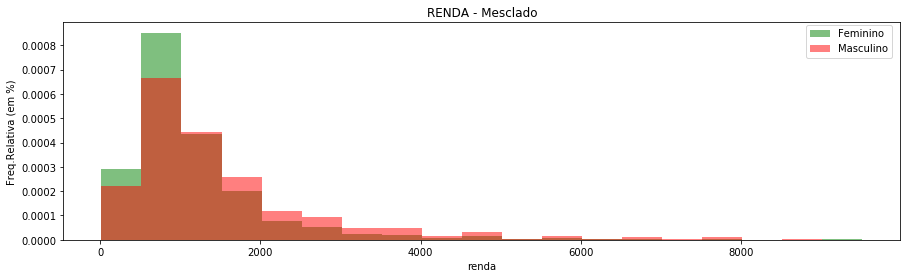

In [367]:
#Mesclado   
fig = plt.figure(figsize=(15, 4))
renda_fem = pd.cut(out.Renda[out.Sexo=='Feminino'], bins=faixa, right=False)                                              
renda_masc = pd.cut(out.Renda[out.Sexo=='Masculino'], bins=faixa, right=False)
plot = out.Renda[out.Sexo=='Feminino'].plot.hist(bins=faixa,normed=1,color=('g'),alpha=0.5,label="Feminino") 
plot2 = out.Renda[out.Sexo=='Masculino'].plot.hist(bins=faixa,normed=1,title='RENDA - Mesclado',color=('r'),ax=plot,alpha=0.5,label="Masculino")
plt.legend(bbox_to_anchor=(0.99, 0.99), loc=0, borderaxespad=0.)
plt.ylabel('Freq.Relativa (em %)')
plt.xlabel('renda')

In [368]:
#Graficos de Escolaridade

#Criando Crosstab entra as variáveis escolaridade e sexo
esc=pd.crosstab(out.Escolaridade,out.Sexo, margins=True)

In [369]:
esc2=esc.loc[(esc.index != "Creche") & (esc.index != "Pré-vestibular") & (esc.index != 'Alfabetização de jovens e adultos') & (esc.index != "Classe de alfabetização - CA ") & (esc.index != "Maternal, jardim de infância etc.") & (esc.index != "Regular do Ensino Fundamental") & (esc.index != "All") ]
esc2

Sexo,Masculino,Feminino,All
Escolaridade,,,
Educação de jovens e adultos,424,366,790
Mestrado ou doutorado,170,228,398
Regular Ensino Médio,901,560,1461
Superior de graduação,3366,3899,7265


Após toda a filtragem, é necessario demonstrar que a porcentagem de homens e mulheres possui valores parecidos, para que exista uma comparação justa entre as variáveis

C:\Users\mathe\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1682: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001EF333D8CC0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000001EF33543898>], dtype=object)

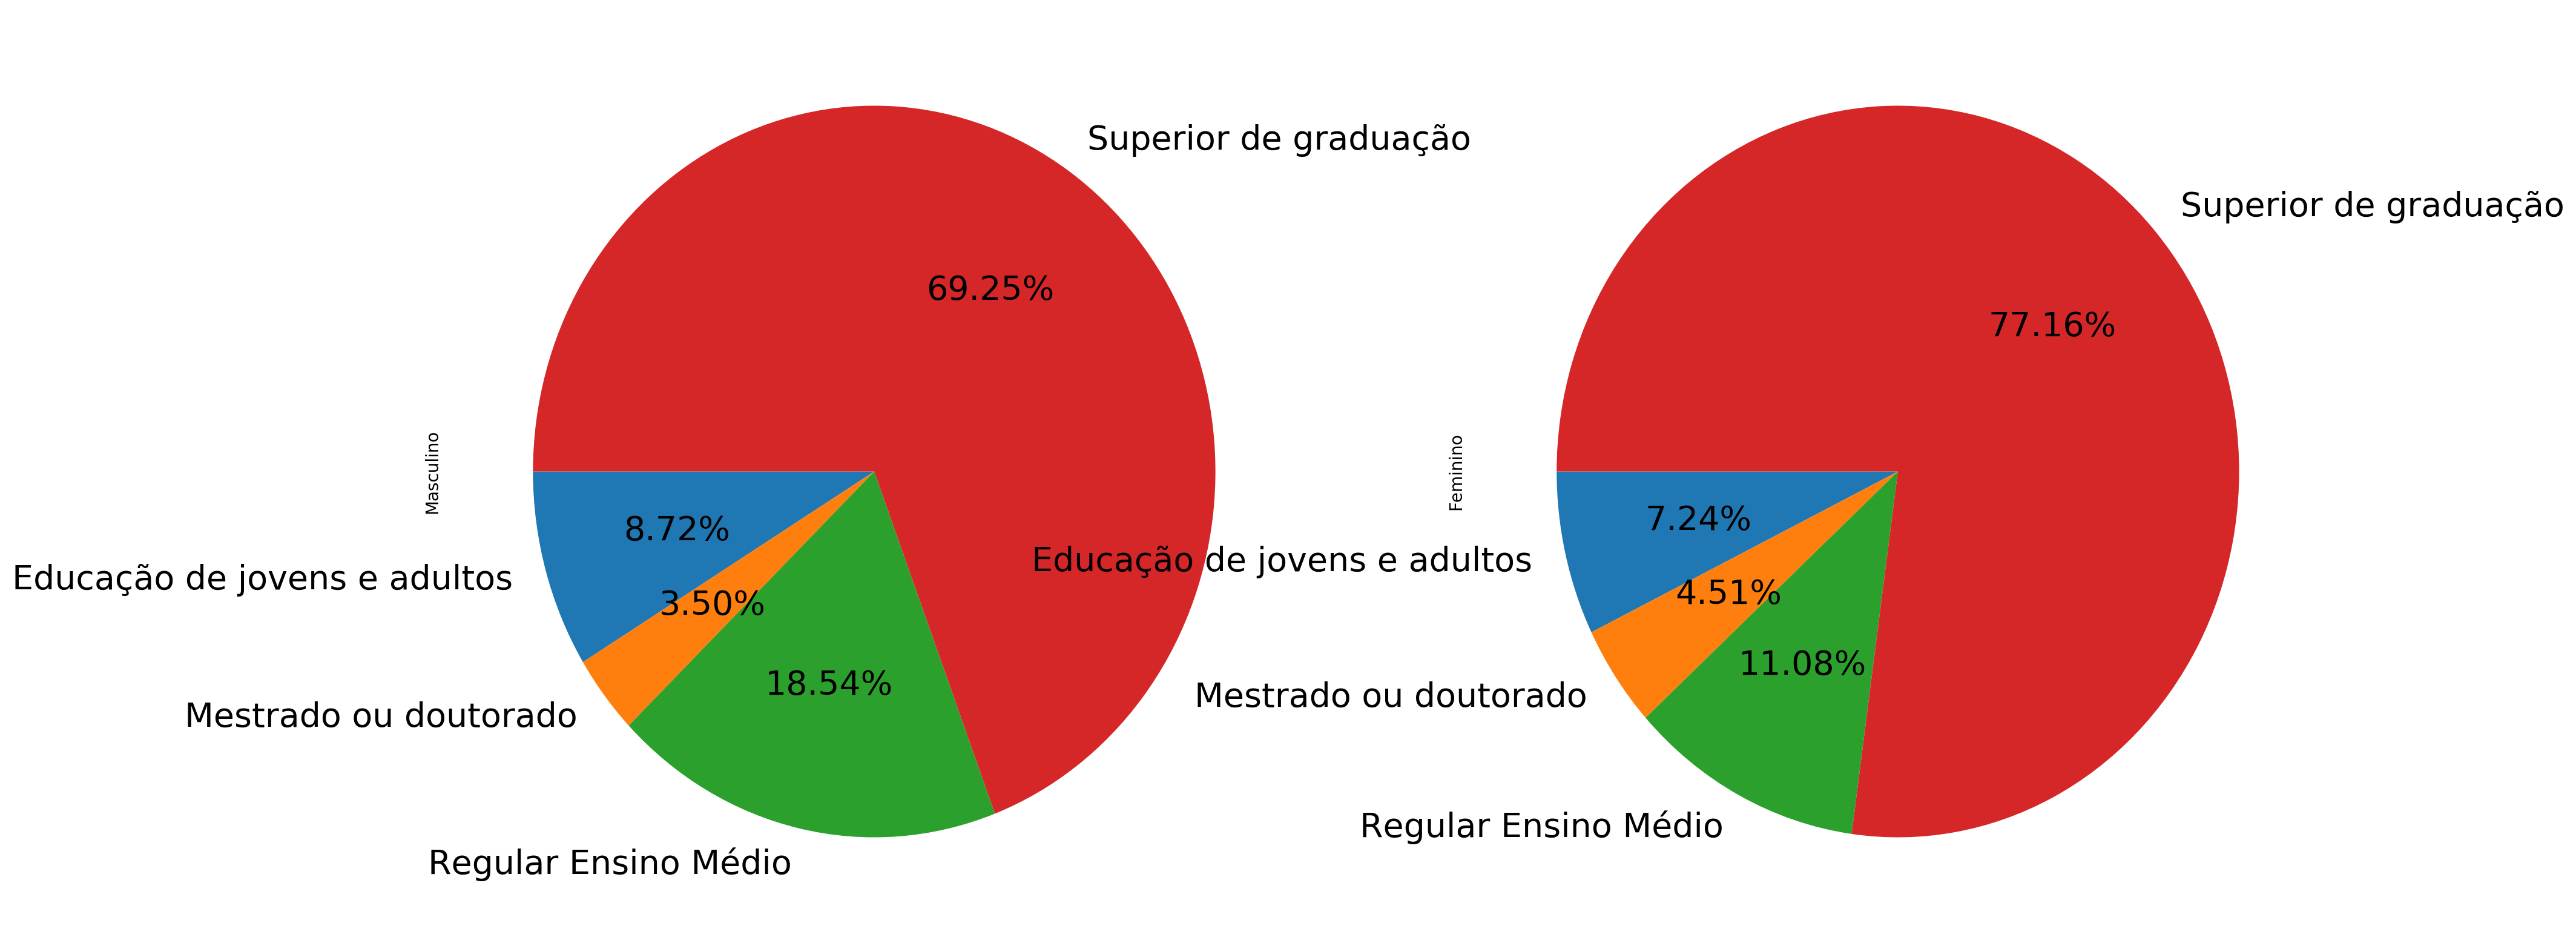

In [370]:
esc2.loc[:, esc2.columns != 'All']
escolaridade=esc2.loc[:,['Masculino','Feminino']]
escolaridade
fig = plt.figure(figsize=(20,10), dpi=200)
ax = plt.subplot(111)
escolaridade.plot(kind='pie', ax=ax,  autopct='%0.2f%%',legend=False,subplots=True,  fontsize=20,startangle=180)

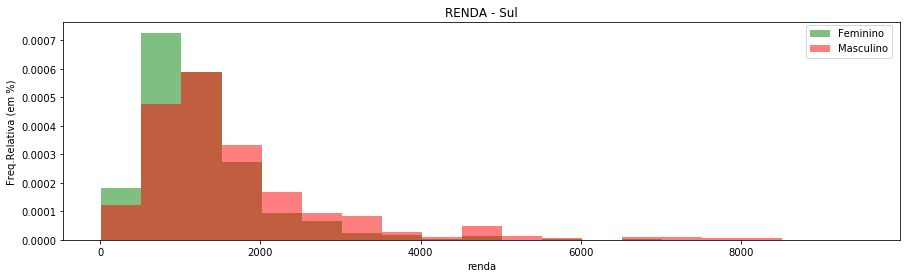

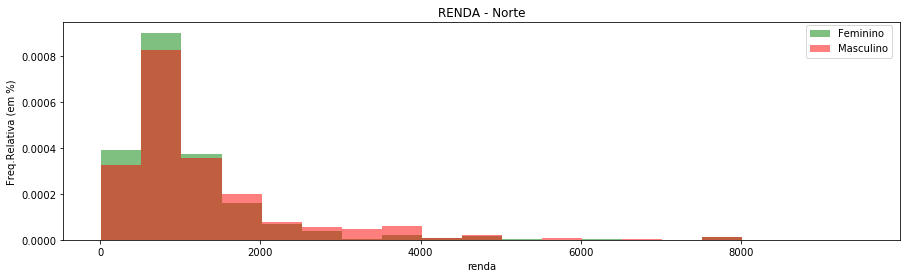

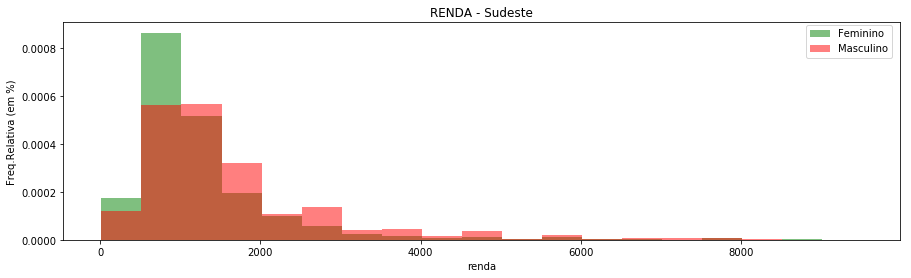

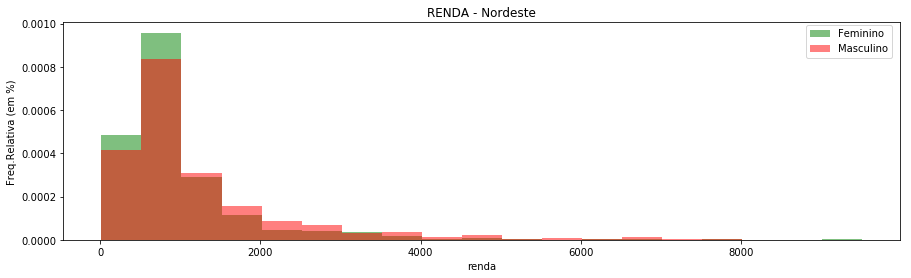

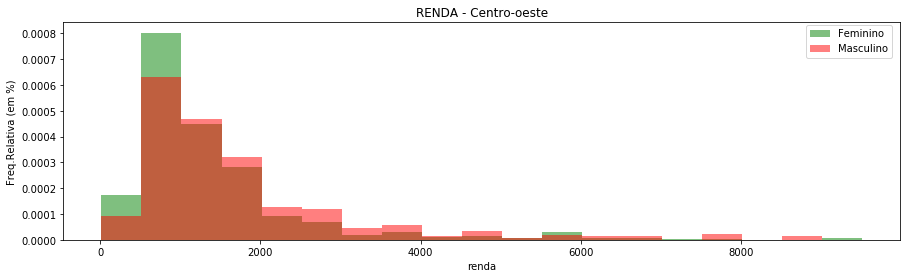

In [384]:
#Gráficos de Renda 
#Definindo Faixa de saltos
faixa = arange(15,10000,500)


#Estados
estado=out.loc[:,['Renda','Região',"Sexo"]]
sul=estado[(estado.Região=="Sul")]
nor=estado[(estado.Região=="Norte")]
nord=estado[(estado.Região=="Nordeste")]
sed=estado[(estado.Região=="Sudeste")]
cen=estado[(estado.Região=="Centro-Oeste")]



#Sul  
fig = plt.figure(figsize=(15, 4))
renda_fem = pd.cut(sul.Renda[sul.Sexo=='Feminino'], bins=faixa, right=False)                                              
renda_masc = pd.cut(sul.Renda[sul.Sexo=='Masculino'], bins=faixa, right=False)
plot = sul.Renda[sul.Sexo=='Feminino'].plot.hist(bins=faixa,normed=1,color=('g'),alpha=0.5,label="Feminino") 
plot2 = sul.Renda[sul.Sexo=='Masculino'].plot.hist(bins=faixa,normed=1,title='RENDA - Sul',color=('r'),ax=plot,alpha=0.5,label="Masculino")
plt.legend(bbox_to_anchor=(0.99, 0.99), loc=0, borderaxespad=0.)
plt.ylabel('Freq.Relativa (em %)')
plt.xlabel('renda')

#Norte
fig = plt.figure(figsize=(15, 4))
renda_fem = pd.cut(nor.Renda[nor.Sexo=='Feminino'], bins=faixa, right=False)                                              
renda_masc = pd.cut(nor.Renda[nor.Sexo=='Masculino'], bins=faixa, right=False)
plot = nor.Renda[nor.Sexo=='Feminino'].plot.hist(bins=faixa,normed=1,color=('g'),alpha=0.5,label="Feminino") 
plot2 = nor.Renda[nor.Sexo=='Masculino'].plot.hist(bins=faixa,normed=1,title='RENDA - Norte',color=('r'),ax=plot,alpha=0.5,label="Masculino")
plt.legend(bbox_to_anchor=(0.99, 0.99), loc=0, borderaxespad=0.)
plt.ylabel('Freq.Relativa (em %)')
plt.xlabel('renda')

#Sudeste   
fig = plt.figure(figsize=(15, 4))
renda_fem = pd.cut(sud.Renda[sud.Sexo=='Feminino'], bins=faixa, right=False)                                              
renda_masc = pd.cut(sud.Renda[sud.Sexo=='Masculino'], bins=faixa, right=False)
plot =sud.Renda[sud.Sexo=='Feminino'].plot.hist(bins=faixa,normed=1,color=('g'),alpha=0.5,label="Feminino") 
plot2 = sud.Renda[sud.Sexo=='Masculino'].plot.hist(bins=faixa,normed=1,title='RENDA - Sudeste',color=('r'),ax=plot,alpha=0.5,label="Masculino")
plt.legend(bbox_to_anchor=(0.99, 0.99), loc=0, borderaxespad=0.)
plt.ylabel('Freq.Relativa (em %)')
plt.xlabel('renda')

#Nordeste 
fig = plt.figure(figsize=(15, 4))
renda_fem = pd.cut(nord.Renda[nord.Sexo=='Feminino'], bins=faixa, right=False)                                              
renda_masc = pd.cut(nord.Renda[nord.Sexo=='Masculino'], bins=faixa, right=False)
plot = nord.Renda[nord.Sexo=='Feminino'].plot.hist(bins=faixa,normed=1,color=('g'),alpha=0.5,label="Feminino") 
plot2 = nord.Renda[nord.Sexo=='Masculino'].plot.hist(bins=faixa,normed=1,title='RENDA - Nordeste',color=('r'),ax=plot,alpha=0.5,label="Masculino")
plt.legend(bbox_to_anchor=(0.99, 0.99), loc=0, borderaxespad=0.)
plt.ylabel('Freq.Relativa (em %)')
plt.xlabel('renda')

#Centro-Oeste 
fig = plt.figure(figsize=(15, 4))
renda_fem = pd.cut(cen.Renda[cen.Sexo=='Feminino'], bins=faixa, right=False)                                              
renda_masc = pd.cut(cen.Renda[cen.Sexo=='Masculino'], bins=faixa, right=False)
plot = cen.Renda[cen.Sexo=='Feminino'].plot.hist(bins=faixa,normed=1,color=('g'),alpha=0.5,label="Feminino") 
plot2 =cen.Renda[cen.Sexo=='Masculino'].plot.hist(bins=faixa,normed=1,title='RENDA - Centro-oeste',color=('r'),ax=plot,alpha=0.5,label="Masculino")
plt.legend(bbox_to_anchor=(0.99, 0.99), loc=0, borderaxespad=0.)
plt.ylabel('Freq.Relativa (em %)')
plt.xlabel('renda')

___
## Análise e Resultados

Analisando os gráficos, divididos por estado é possivel observar que estados da região Norte, Nordeste e Centro-oeste possuem uma distribuição semelhante e que a maior diferença de renda vai estar presente nos estados do sul e do sudeste, porém essa e uma análise que não responde todas as perguntas. Ao analisar os gráficos com mais cuidado é possível observar que a maioria das pessoas que recebem mais, que estão localizadas na "cauda" da assimetria a direita, é em sua grande maioria do sexo masculino 

___
## Conclusão 

Ao comparar a taxa de escolaridade entre os sexos é possível ver que, as mulheres possuem uma taxa maior com relação as estudos, como por exemplo pessoas que possuem Mestrado e Doutorado e pessoas do ensino superior, mas ainda sim existe uma tendência de que elas recebem menos, e isso é acentuado em alguns estados.